In [46]:
#configuration
import os
import torch
# PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
style.use("ggplot")
from textwrap import wrap


In [47]:
 os.walk('/home/roy/Documents/Ai_vs_human')

<generator object _walk at 0x7f4170b4b530>

In [48]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [49]:
file_path = 'AI_Human.csv'
df = pd.read_csv(file_path)
print(df.head())


                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


In [50]:
print(df.shape)

(487235, 2)


In [51]:
print(df.columns)

Index(['text', 'generated'], dtype='object')


In [52]:
df['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [53]:
df0_text = df[df['generated'] == 0].copy()
df1_ai = df[df['generated'] == 1].copy()

In [54]:
df0_text= df0_text[:10000]
df1_ai= df1_ai[:10000]

In [55]:
df = pd.concat([df0_text,df1_ai], ignore_index=True)
df

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
19995,The use of renewable energy sources is an impo...,1.0
19996,High school sports are often a source of pride...,1.0
19997,The beauty of nature can be seen in the cycle ...,1.0
19998,The impact of air pollution on human health is...,1.0


In [56]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/roy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# Initialize Porter Stemmer and stopwords
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))
linking_words = {'to', 'the', 'and', 'of', 'in', 'on', 'for', 'with', 'at', 'a', 'an'}

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to count the length of each text and perform sentiment analysis
def analyze_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Filter out stop words and linking words
    tokens = [token for token in tokens if token not in stop_words and token not in linking_words]
    # Filter out tokens that are not alphabetic
    tokens = [token for token in tokens if token.isalpha()]
    # Sentiment analysis
    sentiment_scores = sid.polarity_scores(text)
    # Return the length of the text and sentiment scores
    return len(tokens), sentiment_scores['compound']

# Apply the function to each text in the DataFrame
df0_text[['text_length', 'sentiment_score']] = df0_text['text'].apply(lambda x: pd.Series(analyze_text(x)))
df1_ai[['text_length', 'sentiment_score']] = df0_text['text'].apply(lambda x: pd.Series(analyze_text(x)))
# Display the DataFrame




In [58]:
import string

def count_punctuation_marks(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

def count_linking_words(text):
    linking_words_count = sum(1 for word in word_tokenize(text.lower()) if word in linking_words)
    return linking_words_count
    
df0_text['punctuation_count'] = df0_text['text'].apply(count_punctuation_marks)
df1_ai['punctuation_count'] = df1_ai['text'].apply(count_punctuation_marks)

df0_text['linking_words_count'] = df0_text['text'].apply(count_linking_words)
df1_ai['linking_words_count'] = df1_ai['text'].apply(count_linking_words)


In [59]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Download WordNet corpus
nltk.download('wordnet')

# Function to count synonyms in a text
def count_synonyms(text):
    synonyms_count = 0
    myset = set()  # Initialize an empty set
    # Tokenize the text
    tokens = word_tokenize(text)
    for word in tokens:
        synsets = wordnet.synsets(word)
        if len(synsets) > 0:
            synonyms_count += 1
            myset.add(word)
    return synonyms_count

# Apply the function to each text in the DataFrame
df0_text['count_synonyms'] = df0_text['text'].apply(count_synonyms)
df1_ai['count_synonyms'] = df1_ai['text'].apply(count_synonyms)


[nltk_data] Downloading package wordnet to /home/roy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
df = pd.concat([df0_text,df1_ai], ignore_index=False)


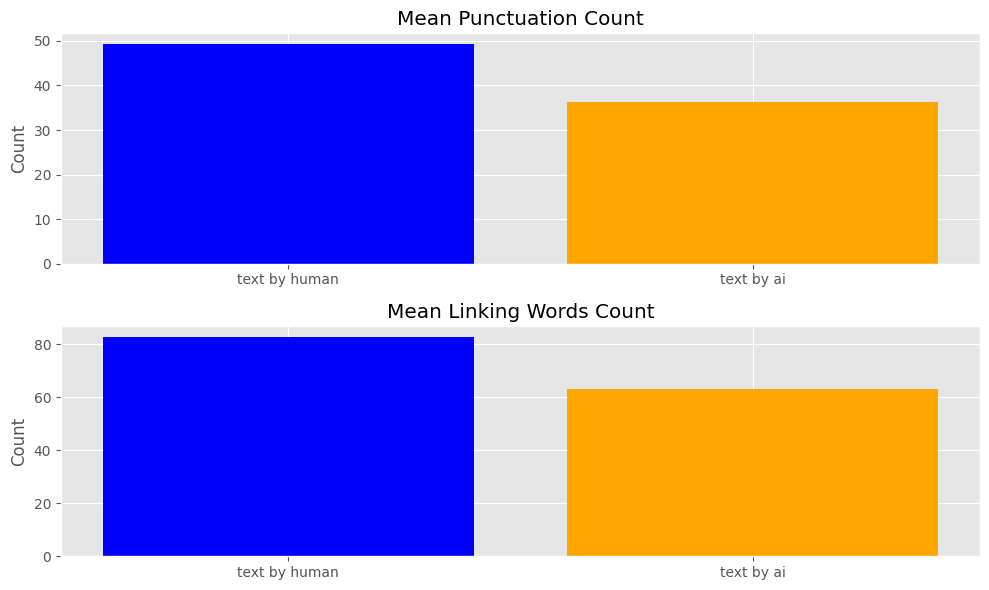

In [61]:
# Calculate the mean punctuation count and linking words count for the first 2000 texts
first_10000_mean_punctuation = df.iloc[:10000]['punctuation_count'].mean()
first_10000_mean_linking_words = df.iloc[:10000]['linking_words_count'].mean()

# Calculate the mean punctuation count and linking words count for the next 2000 texts
next_10000_mean_punctuation = df.iloc[10000:20000]['punctuation_count'].mean()
next_10000_mean_linking_words = df.iloc[10000:20000]['linking_words_count'].mean()

# Create a bar plot for punctuation count
plt.figure(figsize=(10, 6))

# Plotting the mean punctuation count
plt.subplot(2, 1, 1)
plt.bar(['text by human', 'text by ai'], [first_10000_mean_punctuation, next_10000_mean_punctuation], color=['blue', 'orange'])
plt.title('Mean Punctuation Count')
plt.ylabel('Count')

# Plotting the mean linking words count
plt.subplot(2, 1, 2)
plt.bar(['text by human', 'text by ai'], [first_10000_mean_linking_words, next_10000_mean_linking_words], color=['blue', 'orange'])
plt.title('Mean Linking Words Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


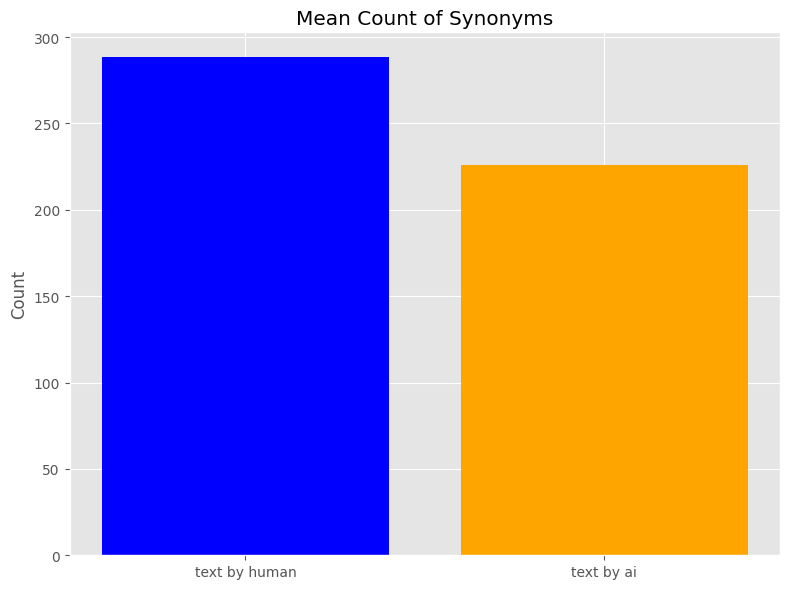

In [62]:
# Calculate the mean count of synonyms for the first 2000 texts
first_2000_mean_synonyms = df.iloc[:10000]['count_synonyms'].mean()

# Calculate the mean count of synonyms for the next 2000 texts
next_2000_mean_synonyms = df.iloc[10000:20000]['count_synonyms'].mean()

# Create a bar plot for synonyms count
plt.figure(figsize=(8, 6))

# Plotting the mean count of synonyms
plt.bar(['text by human', 'text by ai'], [first_2000_mean_synonyms, next_2000_mean_synonyms], color=['blue', 'orange'])
plt.title('Mean Count of Synonyms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [63]:
df.columns


Index(['text', 'generated', 'text_length', 'sentiment_score',
       'punctuation_count', 'linking_words_count', 'count_synonyms'],
      dtype='object')

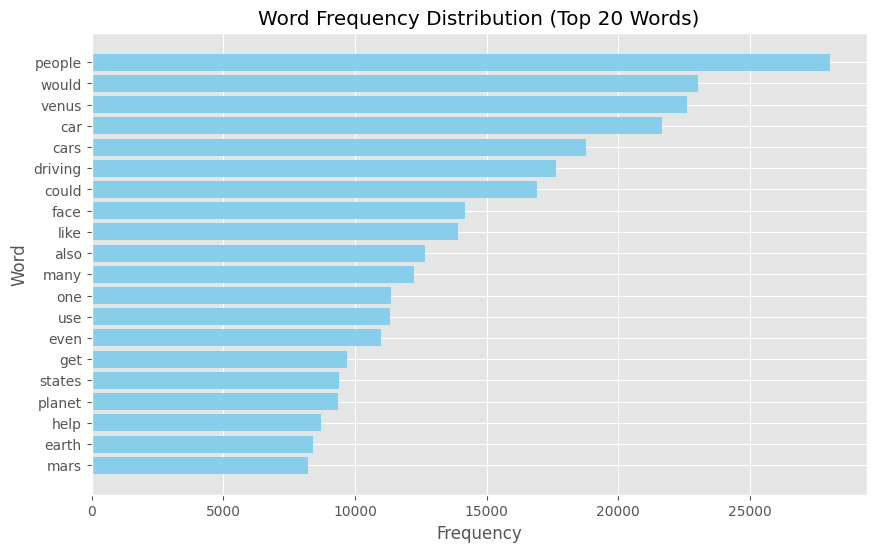

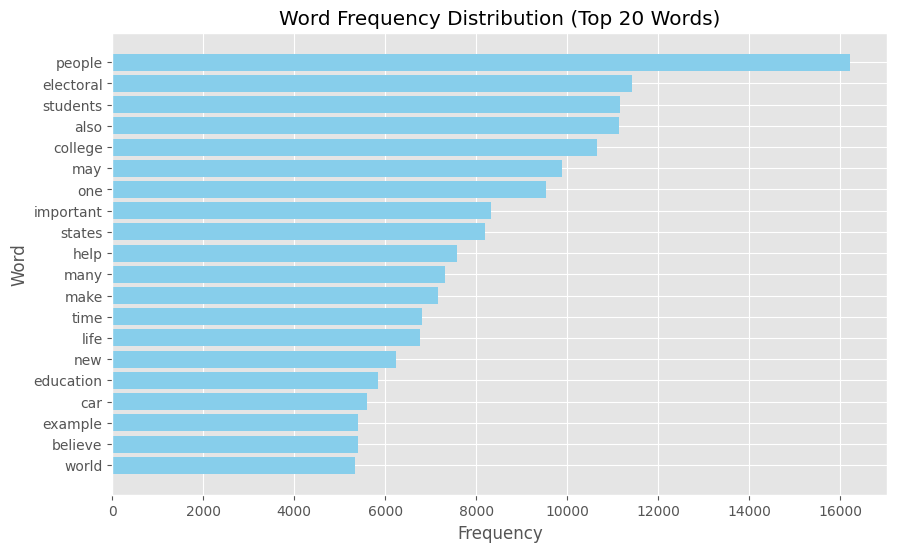

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

def plot_word_frequency(df):
    # Initialize stopwords and tokenizer
    stop_words = set(stopwords.words('english'))

    # Tokenize and preprocess the text
    all_words = ' '.join(df['text']).lower()
    tokens = word_tokenize(all_words)
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Count word occurrences
    word_counts = Counter(filtered_tokens)

    # Select the top 20 most common words
    top_words = word_counts.most_common(20)

    # Separate the top 20 words and their counts
    top_words, top_counts = zip(*top_words)

    # Plot the word frequency distribution
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_counts, color='skyblue')
    plt.title('Word Frequency Distribution (Top 20 Words)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
    plt.show()

# Plot word frequency distribution for df_0
plot_word_frequency(df0_text)

# Plot word frequency distribution for df_1
plot_word_frequency(df1_ai)


In [65]:
# Make a duplicate of the DataFrame
df_copy = df.copy()

# Remove the columns text_length and sentiment_score
df_copy.drop(['text_length', 'sentiment_score'], axis=1, inplace=True)

# Verify the changes
print(df_copy.head())
# Replace NaN values with 0
df_copy.fillna(0, inplace=True)

# Verify the changes
df_copy

                                                text  generated  \
0  Cars. Cars have been around since they became ...        0.0   
1  Transportation is a large necessity in most co...        0.0   
2  "America's love affair with it's vehicles seem...        0.0   
3  How often do you ride in a car? Do you drive a...        0.0   
4  Cars are a wonderful thing. They are perhaps o...        0.0   

   punctuation_count  linking_words_count  count_synonyms  
0                 75                  131             416  
1                 64                  108             348  
2                101                  162             546  
3                124                  133             510  
4                110                  155             608  


,text,generated,punctuation_count,linking_words_count,count_synonyms
0,Cars. Cars have been around since they became ...,0.0,75,131,416
1,Transportation is a large necessity in most co...,0.0,64,108,348
2,"""America's love affair with it's vehicles seem...",0.0,101,162,546
3,How often do you ride in a car? Do you drive a...,0.0,124,133,510
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,608
...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44,236
26091,High school sports are often a source of pride...,1.0,24,46,258
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42,272
26093,The impact of air pollution on human health is...,1.0,26,47,293


In [66]:
# Function to tokenize text and remove stopwords
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.isalpha() and token not in stop_words]

# Tokenize all texts and count word occurrences
all_words = [word for text in df_copy['text'] for word in tokenize_text(text)]
word_counts = Counter(all_words)

# Select the top 500 most common words as features
top_words = [word for word, _ in word_counts.most_common(500)]

# Function to create binary features for the top words
def create_word_features(text):
    tokens = tokenize_text(text)
    return [1 if word in tokens else 0 for word in top_words]

def lengthText(text):
    tokens = word_tokenize(text.lower())
    return len(tokens)
    
df_copy['length_text'] = df_copy['text'].apply(lengthText)
# Create binary features for the top words in each text
df_copy['word_features'] = df_copy['text'].apply(create_word_features)
df_copy

,text,generated,punctuation_count,linking_words_count,count_synonyms,length_text,word_features
0,Cars. Cars have been around since they became ...,0.0,75,131,416,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ..."
1,Transportation is a large necessity in most co...,0.0,64,108,348,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ..."
2,"""America's love affair with it's vehicles seem...",0.0,101,162,546,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ..."
3,How often do you ride in a car? Do you drive a...,0.0,124,133,510,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,608,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
...,...,...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44,236,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
26091,High school sports are often a source of pride...,1.0,24,46,258,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42,272,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
26093,The impact of air pollution on human health is...,1.0,26,47,293,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [67]:
# Function to calculate percentage of synonyms in a text
def calculate_synonym_percentage(text):
    return count_synonyms(text) / len(word_tokenize(text)) * 100


df_copy['synonym_percentage'] = df_copy['text'].apply(calculate_synonym_percentage)



In [68]:
# Function to calculate percentage of synonyms in a text
def calculate_punctuation_count(text):
    return count_punctuation_marks(text) / len(word_tokenize(text)) * 100


df_copy['punctuation_count_percentage'] = df_copy['text'].apply(calculate_punctuation_count)



In [69]:
# Function to calculate percentage of synonyms in a text
def calculate_linking_words_count(text):
    return count_linking_words(text) / len(word_tokenize(text)) * 100

# Add a column to df0_text for synonym percentage
df_copy['linking_words_percentage'] = df_copy['text'].apply(calculate_linking_words_count)



In [70]:
df_copy


,text,generated,punctuation_count,linking_words_count,count_synonyms,length_text,word_features,synonym_percentage,punctuation_count_percentage,linking_words_percentage
0,Cars. Cars have been around since they became ...,0.0,75,131,416,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...",63.221884,11.398176,19.908815
1,Transportation is a large necessity in most co...,0.0,64,108,348,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",66.159696,12.167300,20.532319
2,"""America's love affair with it's vehicles seem...",0.0,101,162,546,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",64.845606,11.995249,19.239905
3,How often do you ride in a car? Do you drive a...,0.0,124,133,510,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",63.354037,15.403727,16.521739
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,608,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...",62.745098,11.351909,15.995872
...,...,...,...,...,...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44,236,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",74.683544,6.329114,13.924051
26091,High school sports are often a source of pride...,1.0,24,46,258,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...",73.925501,6.876791,13.180516
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42,272,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",76.619718,7.323944,11.830986
26093,The impact of air pollution on human health is...,1.0,26,47,293,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",77.718833,6.896552,12.466844


Accuracy: 0.9976666666666667
Train Loss: 0.003006479024528455
Test Loss: 0.006622497654216044
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3017
         1.0       1.00      1.00      1.00      2983

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Class-wise Metrics:
              precision    recall  f1-score      support
0.0            0.997350  0.998011  0.997681  3017.000000
1.0            0.997987  0.997318  0.997653  2983.000000
accuracy       0.997667  0.997667  0.997667     0.997667
macro avg      0.997669  0.997665  0.997667  6000.000000
weighted avg   0.997667  0.997667  0.997667  6000.000000


/home/roy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


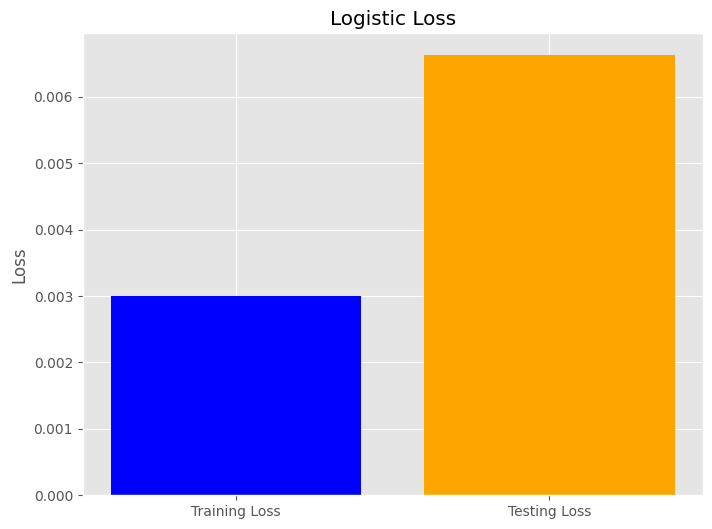

In [71]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from collections import Counter
import matplotlib.pyplot as plt



# Define features (word features, punctuation count, count of synonyms) and target variable
X = pd.DataFrame(df_copy['word_features'].tolist(), columns=top_words)
X['synonym_percentage'] = df_copy['synonym_percentage']
X['punctuation_count_percentage'] = df_copy['punctuation_count_percentage']
X['linking_words_percentage'] = df_copy['linking_words_percentage']
X['length_text'] = df_copy['length_text']
y = df_copy['generated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on the feature matrix X
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the Logistic Regression classifier
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate logistic loss for training and testing sets
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Parse the classification report to get individual class metrics
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)

# Plotting the Loss
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()


Epoch 1/10
500/500 [==============================] - 9s 16ms/step - loss: 0.0603 - accuracy: 0.9786 - val_loss: 0.0175 - val_accuracy: 0.9948
Epoch 2/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0089 - val_accuracy: 0.9975
Epoch 3/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0088 - val_accuracy: 0.9975
Epoch 4/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0095 - val_accuracy: 0.9977
Epoch 5/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0080 - val_accuracy: 0.9975
Epoch 6/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0077 - val_accuracy: 0.9977
Epoch 7/10
500/500 [==============================] - 8s 17ms/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.0116 - val_accuracy: 0.9977

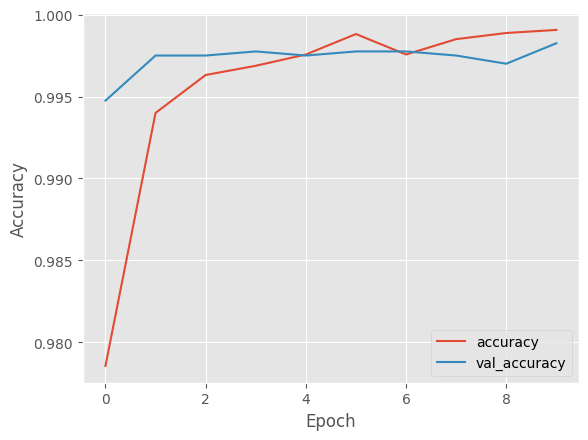

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D

# Define features (word features, punctuation count, count of synonyms) and target variable
X = pd.DataFrame(df_copy['word_features'].tolist(), columns=top_words)
X['synonym_percentage'] = df_copy['synonym_percentage']
X['punctuation_count_percentage'] = df_copy['punctuation_count_percentage']
X['linking_words_percentage'] = df_copy['linking_words_percentage']
X['length_text'] = df_copy['length_text']
y = df_copy['generated']

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on the feature matrix X_train
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)  # Impute validation data, do not fit again

# Reshape input data to fit CNN model
X_train_cnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_valid_cnn = X_valid_imputed.reshape(X_valid_imputed.shape[0], X_valid_imputed.shape[1], 1)

# Define CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile CNN model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_valid_cnn, y_valid))

# Evaluate CNN model
y_train_pred_probs = model.predict(X_train_cnn)
y_valid_pred_probs = model.predict(X_valid_cnn)

# Convert probabilities to class predictions using a threshold (e.g., 0.5)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_valid_pred = (y_valid_pred_probs > 0.5).astype(int)

# Calculate train error
train_error = 1 - accuracy_score(y_train, y_train_pred)

# Calculate validation error
validation_error = 1 - accuracy_score(y_valid, y_valid_pred)

print("Train Error:", train_error)
print("Validation Error:", validation_error)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


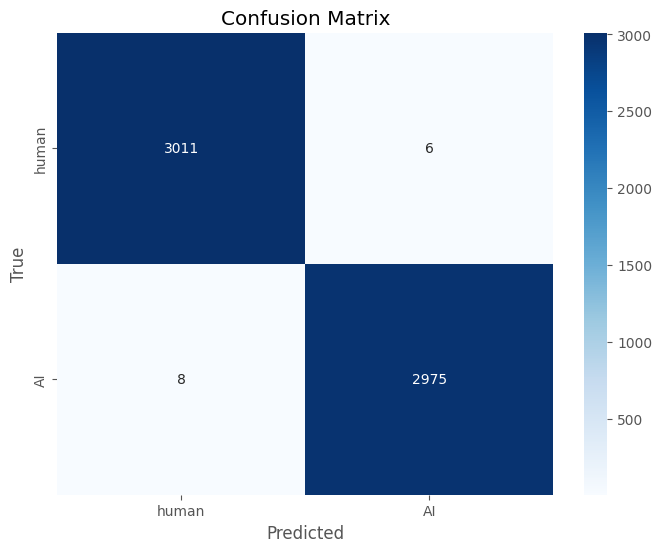

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['human', 'AI'], yticklabels=['human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
